In [916]:
#Getting the Dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [917]:
#Importing the Dataset from the Drive
import pandas as pd
df = pd.read_csv(r'/content/drive/My Drive/sales_prediction.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [918]:
df.rename(columns={'Item_Identifier': 'ID', 'Item_Weight': 'Weight','Item_Fat_Content': 'Fat Content', 'Item_Visibility':'Visibility', 'Item_Type':'Item Type','Item_MRP':'MRP',
                  'Outlet_Identifier': "Outlet ID", 'Outlet_Establishment_Year': 'Est Year','Outlet_Size' : 'Outlet Size'	,
                   'Outlet_Location_Type': 'Outlet Loc Type',	'Outlet_Type' : 'Outlet Type',	'Item_Outlet_Sales' : 'Sales'}, inplace=True)

df.head()

,ID,Weight,Fat Content,Visibility,Item Type,MRP,Outlet ID,Est Year,Outlet Size,Outlet Loc Type,Outlet Type,Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [919]:
#Numerical Columns

num_cols = df.select_dtypes(include=['int64','float64']).columns

import seaborn as sns
import matplotlib.pyplot as plt

#Defining a visualization function
def visualize_Column(df, col):
  fig, ax = plt.subplots(1,2,figsize=(10,5))
  sns.histplot(data = df, x = col, ax = ax[0])
  sns.boxplot(data = df, y = col, ax = ax[1])

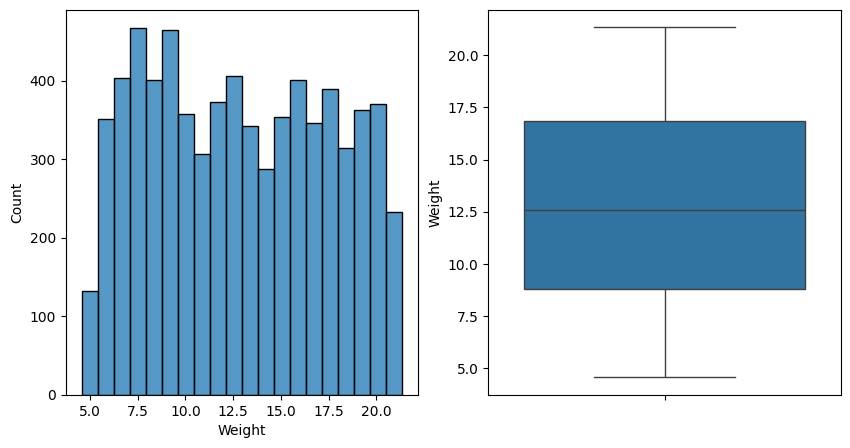

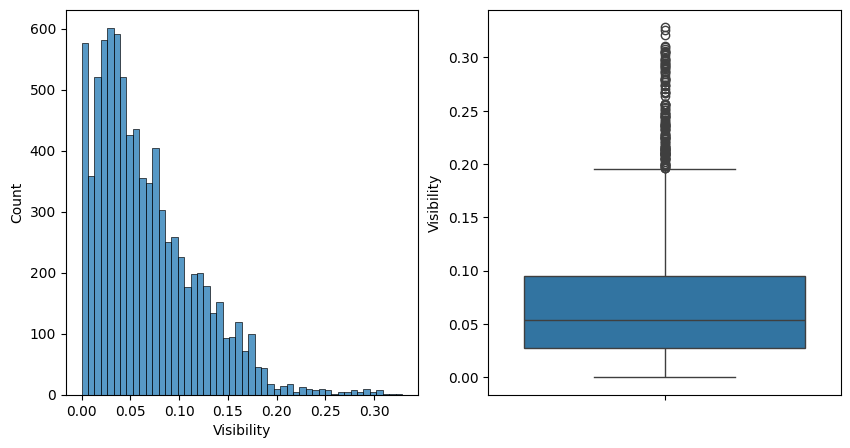

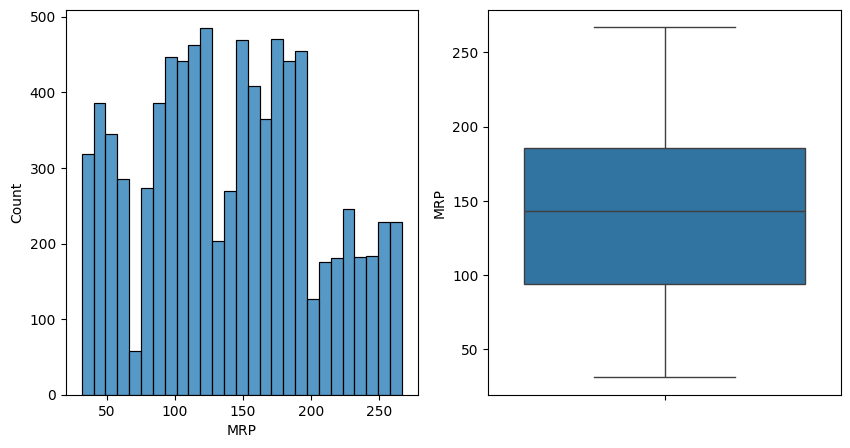

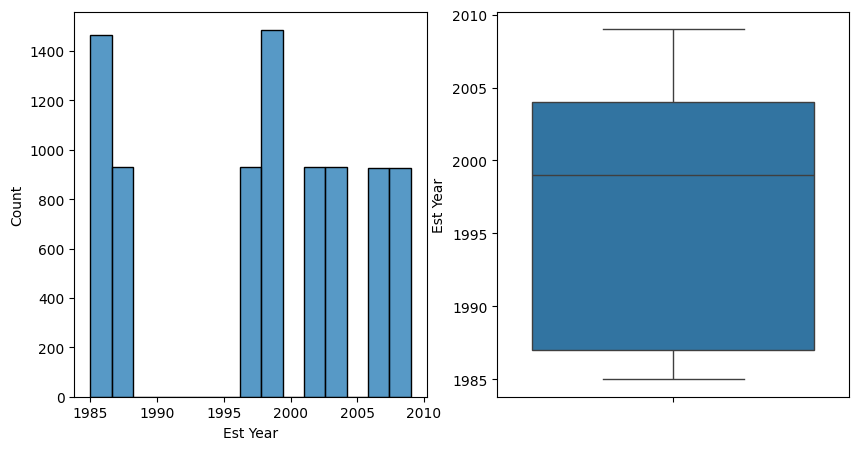

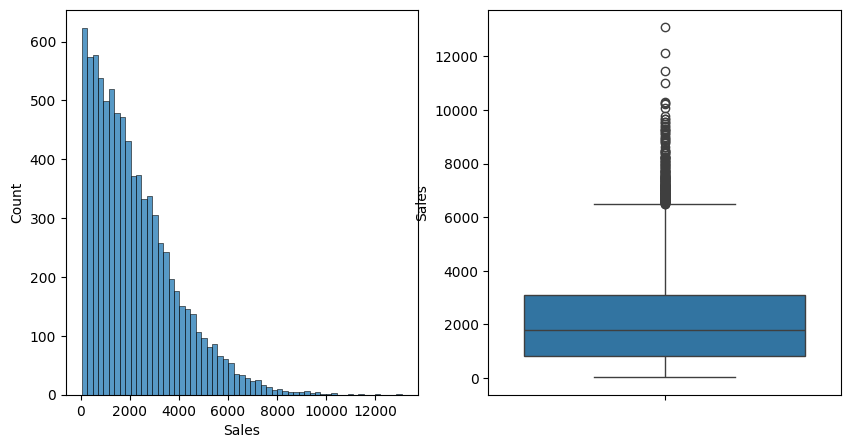

In [920]:
#Visualization
for col in num_cols:
  visualize_Column(df, col)

**Checking for Duplicates**

In [921]:
#Checking for duplicates
df.duplicated().sum()

0

**Missing Values**

In [922]:
#Missing Values
df.isnull().sum()

,0
ID,0
Weight,1463
Fat Content,0
Visibility,0
Item Type,0
MRP,0
Outlet ID,0
Est Year,0
Outlet Size,2410
Outlet Loc Type,0


In [923]:
Mean_Weight = df['Weight'].mean()
Median_Weight = df['Weight'].median()
print(Mean_Weight,Median_Weight)

12.857645184135976 12.6


In [924]:
#Univariate Imputation

df['Weight Mean'] = df['Weight'].fillna(Mean_Weight)
df['Weight Median'] = df['Weight'].fillna(Median_Weight)
df.head()

,ID,Weight,Fat Content,Visibility,Item Type,MRP,Outlet ID,Est Year,Outlet Size,Outlet Loc Type,Outlet Type,Sales,Weight Mean,Weight Median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [925]:
print("Original Weight Variable Variance",df['Weight'].var())
print("Item Weight Variance after Mean Imputation: ",df['Weight Mean'].var())
print("Item Weight Variance after Median Imputation: ",df['Weight Median'].var())

Original Weight Variable Variance 21.561688259836558
Item Weight Variance after Mean Imputation:  17.86012173506058
Item Weight Variance after Median Imputation:  17.869561454073647


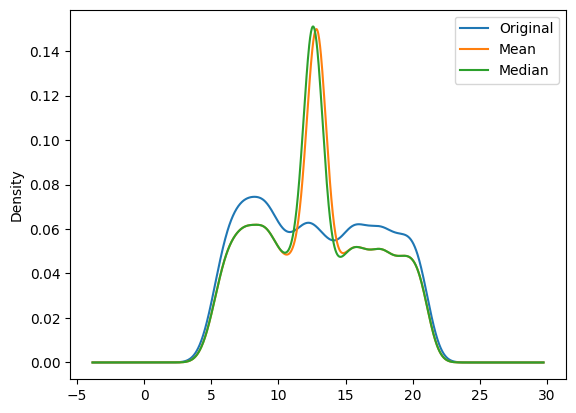

In [926]:
import matplotlib.pyplot as plt

df['Weight'].plot(kind = "kde",label = "Original")
df['Weight Mean'].plot(kind = "kde",label = "Mean")
df['Weight Median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

<Axes: >

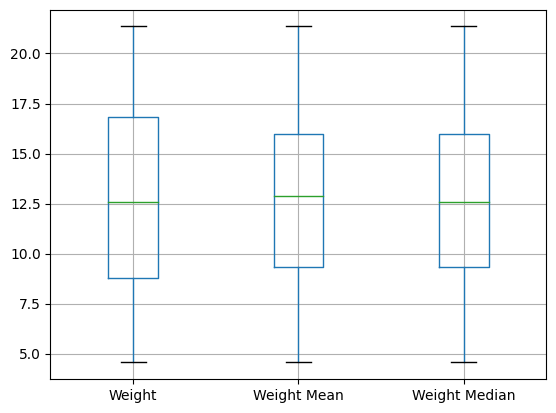

In [927]:
df[['Weight','Weight Mean','Weight Median']].boxplot()

In [928]:
df['Weight Interpolate']=df['Weight'].interpolate(method="linear")

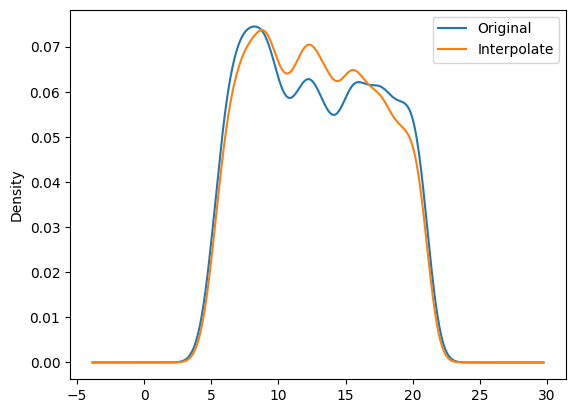

In [929]:
df['Weight'].plot(kind = "kde",label="Original")

df['Weight Interpolate'].plot(kind = "kde",label = "Interpolate")

plt.legend()
plt.show()

**MultiVariate Imputation**

In [930]:
#KNN Imputation
from sklearn.impute import KNNImputer
KNN = KNNImputer(n_neighbors=5)
df['Weight KNN'] = KNN.fit_transform(df[['Weight']]).ravel()
df.head()

,ID,Weight,Fat Content,Visibility,Item Type,MRP,Outlet ID,Est Year,Outlet Size,Outlet Loc Type,Outlet Type,Sales,Weight Mean,Weight Median,Weight Interpolate,Weight KNN
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,8.93,8.93


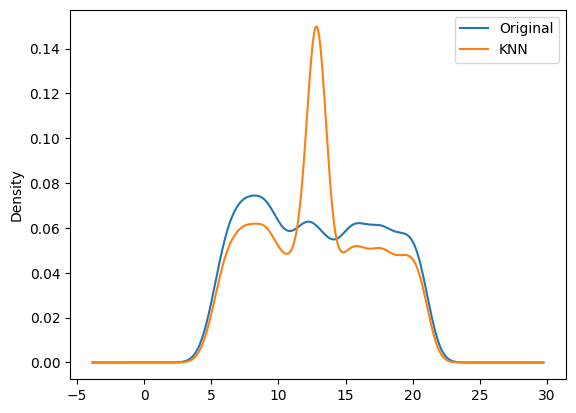

In [931]:
df['Weight'].plot(kind = "kde",label="Original")

df['Weight KNN'].plot(kind = "kde",label = "KNN")

plt.legend()
plt.show()

In [932]:
df = df.drop(columns=['Weight Mean','Weight Median','Weight','Weight KNN'],axis = 1)

In [933]:
df.head()

,ID,Fat Content,Visibility,Item Type,MRP,Outlet ID,Est Year,Outlet Size,Outlet Loc Type,Outlet Type,Sales,Weight Interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [934]:
df.isnull().sum()

,0
ID,0
Fat Content,0
Visibility,0
Item Type,0
MRP,0
Outlet ID,0
Est Year,0
Outlet Size,2410
Outlet Loc Type,0
Outlet Type,0


**Handling Missing Values for Outlet Size**

In [935]:
#outlet Size
df['Outlet Size'].value_counts()

,count
Outlet Size,
Medium,2793
Small,2388
High,932


In [936]:
Mode_Outlet = df.pivot_table(values='Outlet Size',columns='Outlet Type',aggfunc=(lambda x:x.mode()[0]))
Mode_Outlet

Outlet Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet Size,Small,Small,Medium,Medium


In [937]:
Missing_Values = df['Outlet Size'].isnull()

In [938]:
df.loc[Missing_Values,'Outlet Size'] = df.loc[Missing_Values,'Outlet Type'].apply(lambda x :Mode_Outlet[x])

In [939]:
df.isnull().sum()

,0
ID,0
Fat Content,0
Visibility,0
Item Type,0
MRP,0
Outlet ID,0
Est Year,0
Outlet Size,0
Outlet Loc Type,0
Outlet Type,0


**Fat Contents**

In [940]:
df['Fat Content'].value_counts()

,count
Fat Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [941]:
df.replace({'Fat Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)
df['Fat Content'].value_counts()

,count
Fat Content,
LF,5517
Regular,3006


**Item Visibility**

In [942]:
df['Visibility'].value_counts()

,count
Visibility,
0.000000,526
0.076975,3
0.162462,2
0.076841,2
0.073562,2
...,...
0.013957,1
0.110460,1
0.124646,1


In [943]:
#Interpolating
import numpy as np
df['Visibility Interpolate'] = df['Visibility'].replace(0,np.nan).interpolate(method='linear')

df['Visibility Interpolate'].value_counts()

,count
Visibility Interpolate,
0.076975,3
0.044024,2
0.040912,2
0.076856,2
0.078759,2
...,...
0.021011,1
0.099189,1
0.076866,1


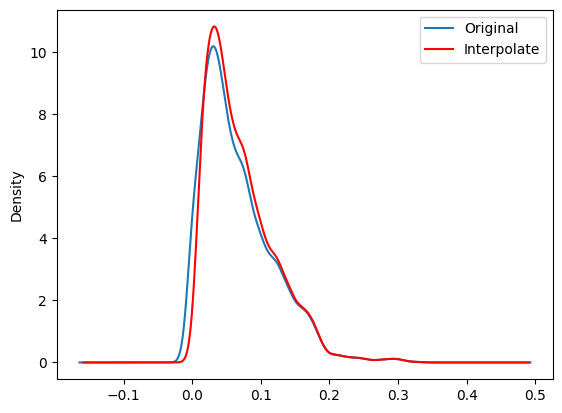

In [944]:
df['Visibility'].plot(kind="kde",label="Original")

df['Visibility Interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [945]:
df = df.drop('Visibility',axis=1)

In [946]:
df.head()

,ID,Fat Content,Item Type,MRP,Outlet ID,Est Year,Outlet Size,Outlet Loc Type,Outlet Type,Sales,Weight Interpolate,Visibility Interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


**Item ID**

In [947]:
df['ID'].value_counts()

,count
ID,
FDW13,10
FDG33,10
NCY18,9
FDD38,9
DRE49,9
...,...
FDY43,1
FDQ60,1
FDO33,1


In [948]:
df['ID'] =df['ID'].apply(lambda x : x[:2])

df['ID'].value_counts()

,count
ID,
FD,6125
NC,1599
DR,799


**Outlet Establishment Year**

In [949]:
#Outlet Est Year
df['Est Year'].value_counts()

,count
Est Year,
1985,1463
1987,932
1999,930
1997,930
2004,930
2002,929
2009,928
2007,926
1998,555


In [950]:
import datetime as dt
current_year = dt.datetime.today().year

df['Outlet Age']= current_year - df['Est Year']

df = df.drop('Est Year',axis=1)
df.head()

,ID,Fat Content,Item Type,MRP,Outlet ID,Outlet Size,Outlet Loc Type,Outlet Type,Sales,Weight Interpolate,Visibility Interpolate,Outlet Age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [951]:
#Grouping Item Type based on Edible and Non Edible
df['Item Type'].value_counts()

,count
Item Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [952]:
#Replacing Edible items with Edible Group and Non Edible Groups
df['Item Type'] = df['Item Type'].apply(lambda x : 'Non Edible' if x in ['Household','Health and Hygiene','Hard Drinks','Others'] else 'Edible')
df['Item Type'].value_counts()

,count
Item Type,
Edible,6710
Non Edible,1813


In [953]:
df.head()

,ID,Fat Content,Item Type,MRP,Outlet ID,Outlet Size,Outlet Loc Type,Outlet Type,Sales,Weight Interpolate,Visibility Interpolate,Outlet Age
0,FD,LF,Edible,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Edible,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Edible,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Edible,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Non Edible,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


**Handling Categorical Data**

In [954]:
from sklearn.preprocessing import OrdinalEncoder

df_encoded = df.copy()

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    df_encoded[col]=oe.fit_transform(df_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Edible', 'Non Edible'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [955]:
df_encoded.head(3)

,ID,Fat Content,Item Type,MRP,Outlet ID,Outlet Size,Outlet Loc Type,Outlet Type,Sales,Weight Interpolate,Visibility Interpolate,Outlet Age
0,1.0,0.0,0.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,0.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,0.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25


In [956]:
X = df_encoded.drop('Sales',axis=1)
y = df_encoded['Sales']

In [957]:
X.head()

,ID,Fat Content,Item Type,MRP,Outlet ID,Outlet Size,Outlet Loc Type,Outlet Type,Weight Interpolate,Visibility Interpolate,Outlet Age
0,1.0,0.0,0.0,249.8092,9.0,1.0,0.0,1.0,9.30,0.016047,25
1,0.0,1.0,0.0,48.2692,3.0,1.0,2.0,2.0,5.92,0.019278,15
2,1.0,0.0,0.0,141.6180,9.0,1.0,0.0,1.0,17.50,0.016760,25
3,1.0,1.0,0.0,182.0950,0.0,2.0,2.0,0.0,19.20,0.015755,26
4,2.0,0.0,1.0,53.8614,1.0,0.0,2.0,1.0,8.93,0.014751,37


In [958]:
y.head()

,Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [959]:
X.drop([ 'Fat Content', 'Outlet Loc Type', 'ID', 'Visibility Interpolate', "Item Type", 'Weight Interpolate', 'Outlet Size'] , axis = 1, inplace = True)
X.head()

,MRP,Outlet ID,Outlet Type,Outlet Age
0,249.8092,9.0,1.0,25
1,48.2692,3.0,2.0,15
2,141.6180,9.0,1.0,25
3,182.0950,0.0,0.0,26
4,53.8614,1.0,1.0,37


In [960]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)
X.head()

# Fit and transform the target variable
y_scaled = sc.fit_transform(y.values.reshape(-1, 1))
y = y_scaled.ravel()

**Modeling**

In [961]:
#Training Models

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [967]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_final = RandomForestRegressor()
rf_final.fit(X_train,y_train)
rf_final.score(X_test,y_test)
scores = cross_val_score(rf_final,X,y,cv=5,scoring='r2')
print('R2 score:', scores.mean())

R2 score: 0.45362562614399915


In [963]:
#XGBoost
from xgboost import XGBRFRegressor
xg_final = XGBRFRegressor()
xg_final.fit(X_train,y_train)
xg_final.score(X_test,y_test)
scores = cross_val_score(xg_final,X,y,cv=5,scoring='r2')
print('R2 score:', scores.mean())

R2 score: 0.5965381097246879


In [964]:
#RNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
rnn_model = Sequential()
rnn_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
rnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stopping])
y_pred = rnn_model.predict(X_test)
r2_rnn = r2_score(y_test, y_pred)
print(f"RNN Model R2 Score: {r2_rnn}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


214/214 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.7850 - val_loss: 0.4845
Epoch 2/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5202 - val_loss: 0.4382
Epoch 3/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5015 - val_loss: 0.3840
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4242 - val_loss: 0.3708
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4090 - val_loss: 0.3644
Epoch 6/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4336 - val_loss: 0.3640
Epoch 7/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4108 - val_loss: 0.3617
Epoch 8/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3989 - val_loss: 0.3624
Epoch 9/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4006 - val_loss: 0.3582
Epoch 10/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4206 - val_loss: 0.3599
Epoch 11/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4092 - val_loss: 0.3630
Epoch 12/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

In [965]:
import tensorflow
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Build a Custom deep learning model for regression
custom_model = Sequential()

# Layer 1: Dense with L2 regularization and Dropout
custom_model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
custom_model.add(Dropout(0.4))

# Layer 2: Dense with BatchNormalization and Dropout
custom_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
custom_model.add(Dropout(0.4))
custom_model.add(BatchNormalization())

# Layer 3: Dense with BatchNormalization and Dropout
custom_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
custom_model.add(Dropout(0.3))
custom_model.add(BatchNormalization())

# Layer 4: Dense with Dropout
custom_model.add(Dense(64, activation='relu'))
custom_model.add(Dropout(0.3))

# Layer 5: Dense with BatchNormalization
custom_model.add(Dense(32, activation='relu'))
custom_model.add(BatchNormalization())
custom_model.add(Dropout(0.2))

# Output layer for regression
custom_model.add(Dense(1))

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
custom_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
custom_model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_test, y_test),
                   callbacks=[early_stopping])

# Make predictions
y_pred = custom_model.predict(X_test)

# Calculate R2 Score
r2_custom = r2_score(y_test, y_pred)
print(f"Custom Model R2 Score: {r2_custom}")


Epoch 1/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 2.3465 - val_loss: 1.0272
Epoch 2/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.1859 - val_loss: 0.9124
Epoch 3/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.9921 - val_loss: 0.8002
Epoch 4/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.8922 - val_loss: 0.7106
Epoch 5/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7977 - val_loss: 0.6251
Epoch 6/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7196 - val_loss: 0.5767
Epoch 7/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6780 - val_loss: 0.5284
Epoch 8/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6504 - val_loss: 0.4935
Epoch 9/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5985 - val_loss: 0.4807
Epoch 10/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5803 - val_loss: 0.4579
Epoch 11/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5688 - val_loss: 0.4572
Epoch 12/500
107/107 ━━━━━━━━━